# Compara el tipo de projección (espacio 2D) generada por PCA y t-SNE

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.reshape(x_train, (len(x_train), -1)) / 255.
x_test = np.reshape(x_test, (len(x_test), -1)) / 255.

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


# Part 1: PCA

In [3]:
# Create a PCA object and train it
pca = PCA(n_components=2).fit(x_train)

(60000, 2)
(10000, 2)


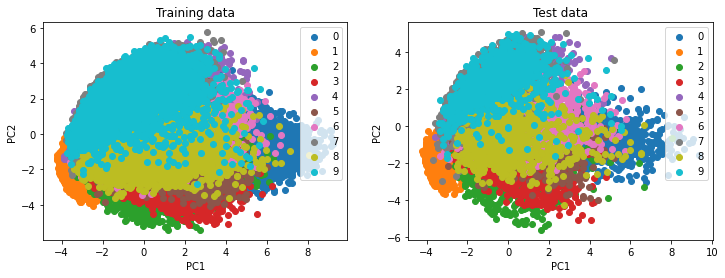

In [4]:
# Transform data and plot it
z_train = pca.transform(x_train)
z_test = pca.transform(x_test)

print(z_train.shape)
print(z_test.shape)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title("Training data")
for cl in range(10):
    plt.scatter(z_train[y_train==cl, 0], z_train[y_train==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(1, 2, 2)
plt.title("Test data")
for cl in range(10):
    plt.scatter(z_test[y_test==cl, 0], z_test[y_test==cl, 1], label=cl)
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Part 2: t-SNE

In [5]:
# Let's use now t-SNE
# NOTA: Usen pocos datos, ej, 10000, porque puede tomar demasiado tiempo
z_train = TSNE(n_components=2).fit_transform(x_train[:10000])
print(z_train.shape)

/home/eroman/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/eroman/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(10000, 2)


In [6]:
# Now with the test set. Twice
z_test1 = TSNE(n_components=2).fit_transform(x_test)
print(z_test1.shape)

z_test2 = TSNE(n_components=2).fit_transform(x_test)
print(z_test2.shape)

/home/eroman/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/eroman/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(10000, 2)


/home/eroman/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/eroman/.conda/envs/py37/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(10000, 2)


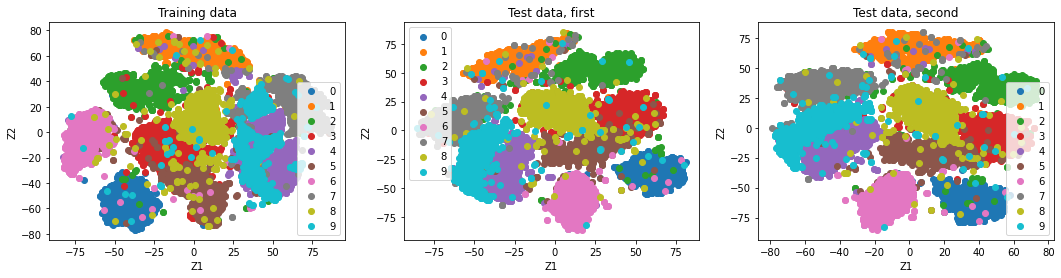

In [8]:
# Plot all three projections
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.title("Training data")
for cl in range(10):
    plt.scatter(z_train[y_train[:10000]==cl, 0], z_train[y_train[:10000]==cl, 1], label=cl)
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

plt.subplot(1, 3, 2)
plt.title("Test data, first")
for cl in range(10):
    plt.scatter(z_test1[y_test==cl, 0], z_test1[y_test==cl, 1], label=cl)
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

plt.subplot(1, 3, 3)
plt.title("Test data, second")
for cl in range(10):
    plt.scatter(z_test2[y_test==cl, 0], z_test2[y_test==cl, 1], label=cl)
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

plt.show()

In [9]:
# ¿Por qué reentrenamos para el set de test, en vez de usar un método transform?
# ¿Por qué nos da resultados distintos en cada corrida, incluso aplicado sobre los
# mismos datos?